In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_set=pd.read_csv(r"C:\Users\pc\Desktop\Data Science Assignments\Clustring\EastWestAirlines (1).csv")
data_set.head(20)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [3]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
del data_set['ID#']

In [5]:
data_set.head(2)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0


# Normalization

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scale= StandardScaler()

In [8]:
scaled_data_set=scale.fit_transform(data_set.iloc[:,1:,])
scaled_data_set

array([[-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.39545434, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.37995704, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
         1.41192021, -0.7669193 ],
       ...,
       [-0.18629869,  0.68312117, -0.09824189, ..., -0.36216787,
        -1.31560393,  1.30391816],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.09850333,
        -1.31608822, -0.7669193 ],
       [-0.18629869, -0.76957841, -0.09824189, ..., -0.36216787,
        -1.31754109, -0.7669193 ]])

# Build Cluster Algorithm

## build k means cluster algo.
### wcss method to find k

<function matplotlib.pyplot.show(close=None, block=None)>

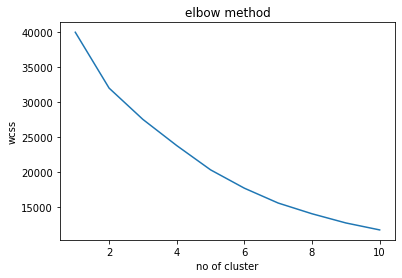

In [9]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    clstr=KMeans(i,random_state=0)
    clstr.fit(scaled_data_set)
    wcss.append(clstr.inertia_)
plt.plot(range(1,11),wcss)
plt.title("elbow method")
plt.xlabel("no of cluster")
plt.ylabel("wcss")
plt.show

In [10]:
from sklearn.cluster import KMeans

In [11]:
cluster=KMeans(2,random_state=0)

In [12]:
cluster.fit(scaled_data_set)

KMeans(n_clusters=2, random_state=0)

In [13]:
cluster.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [14]:
data_set["labels"]=cluster.labels_

In [15]:
data_set

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,labels
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [16]:
grouped=data_set.groupby('labels')
for name,group in grouped:
    print(name)
    print(group)

0
      Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
4       97752           0          4          1          1        43300   
6       84914           0          3          1          1        27482   
8      443003           0          3          2          1         1753   
9      104860           0          3          1          1        28426   
11      96522           0          5          1          1        61105   
...       ...         ...        ...        ...        ...          ...   
3973    72297           0          3          1          1        16241   
3974    58387           0          3          1          1        14581   
3979    57793           0          3          1          1        20959   
3980    28867           0          3          1          1        19169   
3985    59017           0          4          1          1        34746   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
4              26    

# Hierarchical clustring

In [17]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [18]:
#dendograme=sch.dendrogram(sch.linkage(scaled_data_set,method='complete'))

In [19]:
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')

In [20]:
hc.fit(scaled_data_set)

AgglomerativeClustering(linkage='complete')

In [21]:
hc.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
data_set['h_cluster']=hc.labels_

In [23]:
data_set.head(1000)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,labels,h_cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,101089,0,3,1,1,23503,17,0,0,5834,0,1,0
996,7560,0,1,1,1,0,0,0,0,5833,0,1,0
997,255797,0,5,1,1,62107,16,0,0,5832,1,0,0
998,192046,0,4,1,1,54818,52,1200,3,5829,0,0,0


In [24]:
data_set.groupby('h_cluster').agg(['mean'])

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,labels
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
h_cluster,,,,,,,,,,,,
0,73542.85632,143.911389,2.059074,1.014518,1.012265,17096.29612,11.54418,440.531414,1.325657,4120.4801,0.369712,0.672591
1,131999.50000,347.000000,2.500000,1.000000,1.000000,65634.25000,69.25000,19960.000000,49.250000,2200.2500,1.000000,0.000000
